### Importing  Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

### Loading the Datset

In [2]:
df = pd.read_csv(r"C:\Users\Tushar\Downloads\salaries.csv")

## Basic info

In [3]:
print("Shape of Data:",df.shape)

Shape of Data: (73148, 11)


In [4]:
print("Top 5 Records:")
df.head(5)

Top 5 Records:


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025,SE,FT,Data Product Owner,170000,USD,170000,US,0,US,M
1,2025,SE,FT,Data Product Owner,110000,USD,110000,US,0,US,M
2,2025,SE,FT,Data Product Owner,170000,USD,170000,US,0,US,M
3,2025,SE,FT,Data Product Owner,110000,USD,110000,US,0,US,M
4,2025,SE,FT,Engineer,143000,USD,143000,US,0,US,M


In [5]:
# Info of Dataset (Data type and not-null values)
print("Info of Dataset:")
df.info()

Info of Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73148 entries, 0 to 73147
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           73148 non-null  int64 
 1   experience_level    73148 non-null  object
 2   employment_type     73148 non-null  object
 3   job_title           73148 non-null  object
 4   salary              73148 non-null  int64 
 5   salary_currency     73148 non-null  object
 6   salary_in_usd       73148 non-null  int64 
 7   employee_residence  73148 non-null  object
 8   remote_ratio        73148 non-null  int64 
 9   company_location    73148 non-null  object
 10  company_size        73148 non-null  object
dtypes: int64(4), object(7)
memory usage: 6.1+ MB


## Descriptive Statistics

In [6]:
df.describe(include="all")

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
count,73148.000000,73148,73148,73148,7.314800e+04,73148,73148.000000,73148,73148.000000,73148,73148
unique,NaN,4,4,289,NaN,25,NaN,93,NaN,86,3
top,NaN,SE,FT,Data Scientist,NaN,USD,NaN,US,NaN,US,M
freq,NaN,42926,72808,11443,NaN,69418,NaN,65982,NaN,66035,70536
mean,2023.831192,NaN,NaN,NaN,1.625534e+05,NaN,158013.748619,NaN,21.582955,NaN,NaN
std,0.477551,NaN,NaN,NaN,1.925761e+05,NaN,72501.304728,NaN,41.023051,NaN,NaN
min,2020.000000,NaN,NaN,NaN,1.400000e+04,NaN,15000.000000,NaN,0.000000,NaN,NaN
25%,2024.000000,NaN,NaN,NaN,1.069575e+05,NaN,106890.000000,NaN,0.000000,NaN,NaN
50%,2024.000000,NaN,NaN,NaN,1.480000e+05,NaN,147500.000000,NaN,0.000000,NaN,NaN
75%,2024.000000,NaN,NaN,NaN,2.000000e+05,NaN,199700.000000,NaN,0.000000,NaN,NaN


## Checking of Missing Values

In [7]:
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

## Separating the Numerical and Categorical Columns

In [8]:
num_col=[]
cat_col=[]

for col in df.columns:
    if df[col].dtypes == 'int64':
        num_col.append(col)
    else:
        cat_col.append(col)

print("Numerical Columns:", num_col)
print("Categorical Columns:", cat_col)

Numerical Columns: ['work_year', 'salary', 'salary_in_usd', 'remote_ratio']
Categorical Columns: ['experience_level', 'employment_type', 'job_title', 'salary_currency', 'employee_residence', 'company_location', 'company_size']


# Univariable Analysis

## Distribution of Experience Level

In [9]:
# Converting the Shortform for better Explaination 
df['experience_level']=df['experience_level'].replace({'SE':'Senior-level','MI':'Mid-level','EN':'Entry-level',"EX":'Executive-level'})
print(df['experience_level'].unique())

['Senior-level' 'Entry-level' 'Mid-level' 'Executive-level']


#### We Labelled the Experience Level Column to improve readability and interpretation

Experience Level Distribution:
experience_level
Senior-level       42926
Mid-level          21851
Entry-level         6877
Executive-level     1494
Name: count, dtype: int64


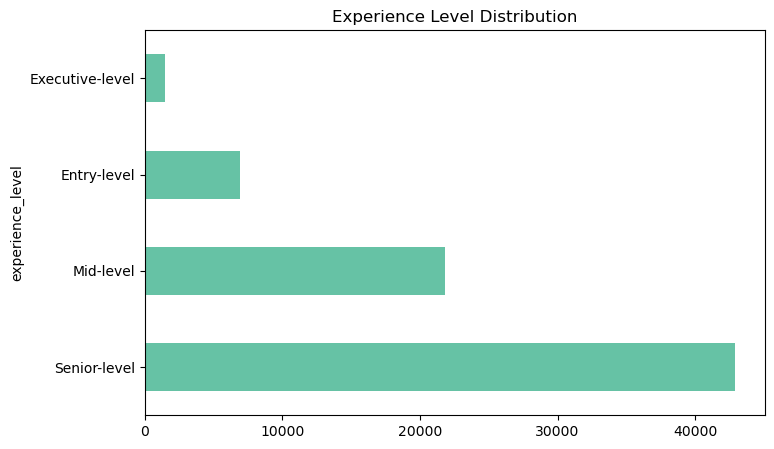

In [10]:
# Generating Distribution Graph For Experience
Exp_dist = df['experience_level'].value_counts()
print(f"Experience Level Distribution:\n{Exp_dist}")
Exp_dist.plot(kind='barh', figsize=(8,5),color='#66c2a5', title="Experience Level Distribution")
plt.show()

#### From the Above Graph we can tell Senior level workers are high in Companies,Most positions require substantial experience, suggesting that higher salaries and leadership roles dominate the workforce composition.

## Distrbution of Employment type

Employment_type:
employment_type
FT    72808
PT      175
CT      149
FL       16
Name: count, dtype: int64


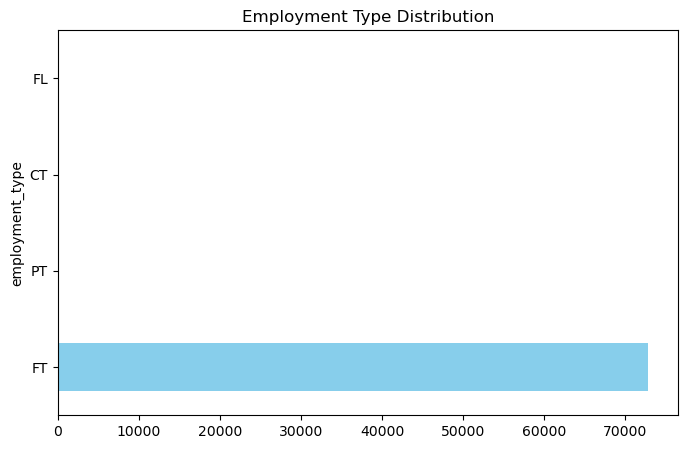

In [11]:
Emp_dist=df['employment_type'].value_counts()
print(f"Employment_type:\n{Emp_dist}")
Emp_dist.plot(kind='barh', figsize=(8,5),color='skyblue', title="Employment Type Distribution")
plt.show()

#### Above graph shows that Most of the salary expenditure goes to full-time staff, reflecting standard employment, while alternative work arrangements are barely represented.

## Distribution by Job Title

Job_title:
job_title
Data Scientist                      11443
Data Engineer                        9405
Software Engineer                    7814
Data Analyst                         7334
Machine Learning Engineer            5807
                                    ...  
Applied Research Scientist              1
People Data Analyst                     1
AI Software Development Engineer        1
Lead AI Engineer                        1
Controls Engineer                       1
Name: count, Length: 289, dtype: int64


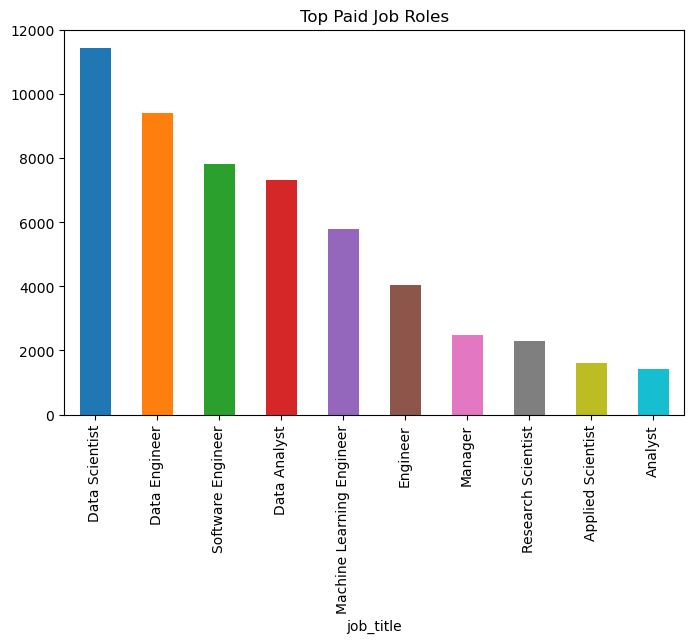

In [12]:
job_dist=df['job_title'].value_counts()
print(f"Job_title:\n{job_dist}")
top_job = job_dist.head(10)
colors = sns.color_palette("tab10", 10)
top_job.plot(kind='bar', figsize=(8,5), title="Top Paid Job Roles", color=colors)
plt.show()

#### 💡 Job Title Distribution

#### Most common roles:

#### Data Scientist (11,443), Data Engineer (9,405), Software Engineer (7,814), Data Analyst (7,334), Machine Learning Engineer (5,807) dominate the dataset.

#### Rare roles: Several positions such as Applied Research Scientist, People Data Analyst, AI Software Development Engineer, Lead AI Engineer, Controls Engineer appear only once.

#### Takeaway: The dataset is heavily concentrated in core data and software roles, while highly specialized roles are sparsely represented.


## Distribution of salary_currency

Salary_currency:
salary_currency
USD    69418
GBP     2046
EUR     1225
CAD      223
INR       73
Name: count, dtype: int64


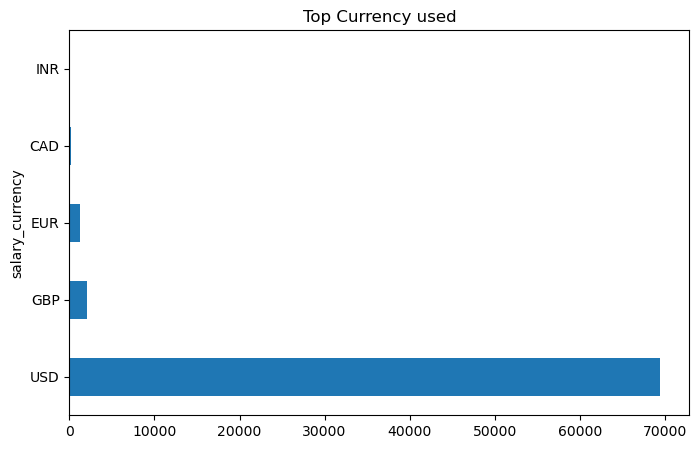

In [13]:
sal_dist=df['salary_currency'].value_counts()
print(f"Salary_currency:\n{sal_dist.head()}")
top_cur = sal_dist.head()
top_cur.plot(kind='barh', figsize=(8,5), title="Top Currency used")
plt.show()

### Above graph shows that vast majority of salaries are reported in USD

## Distribution of Employee residence and Company Location

employee_residence:
employee_residence
US    65982
CA     2513
GB     2127
AU      238
DE      222
Name: count, dtype: int64
company_location:
company_location
US    66035
CA     2515
GB     2135
AU      242
DE      230
Name: count, dtype: int64


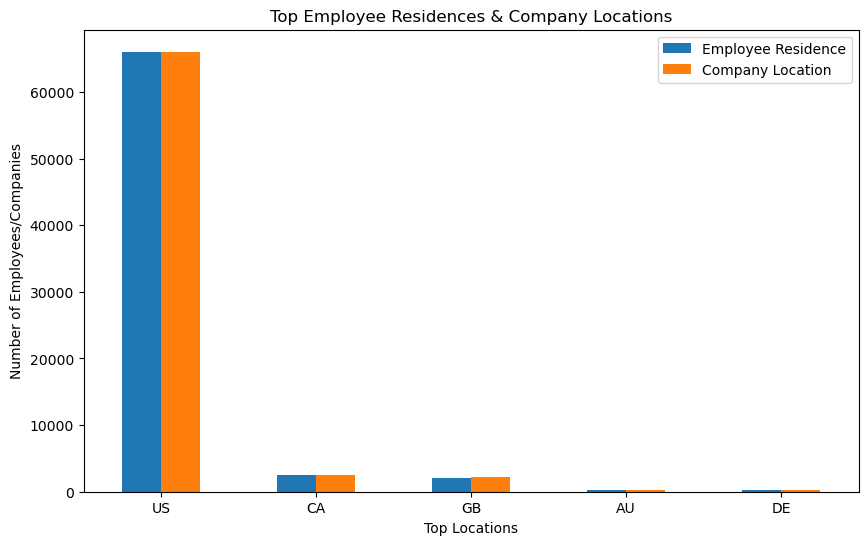

In [14]:
res_dist = df['employee_residence'].value_counts()
top_res = res_dist.head()
print(f"employee_residence:\n{res_dist.head()}")
loc_dist = df['company_location'].value_counts()
top_loc = loc_dist.head()
print(f"company_location:\n{loc_dist.head()}")
# Combine into a single DataFrame for plotting
combined_df = pd.DataFrame({
    'Employee Residence': top_res,
    'Company Location': top_loc
})

# Plot side-by-side bar chart
combined_df.plot(kind='bar', figsize=(10,6))
plt.title("Top Employee Residences & Company Locations")
plt.ylabel("Number of Employees/Companies")
plt.xlabel("Top Locations")
plt.xticks(rotation=0)
plt.legend(title="")
plt.show()

#### Employee Residence vs Company Location

#### Top countries: US dominates both employee residence (65,982) and company location (66,035), followed by Canada (≈2.5k), UK (≈2.1k), Australia (≈240), and Germany (≈220).

#### Observation: Employee distribution closely mirrors company locations, suggesting most employees work in the same country as their company.

#### Takeaway: The dataset is heavily US-centric, with smaller representation from other countries.

## Distribution of Company Size

Company Size:
company_size
M    70536
L     2407
S      205
Name: count, dtype: int64


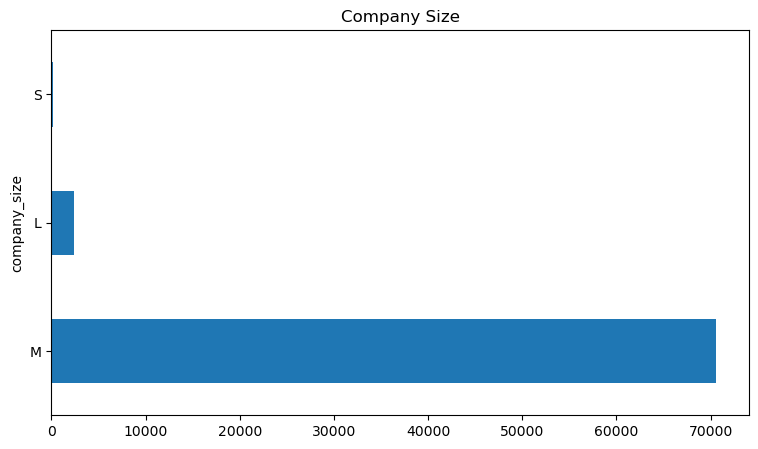

In [15]:
com_dist=df['company_size'].value_counts()
print(f"Company Size:\n{com_dist.head(10)}")
com_dist.plot(kind='barh', figsize=(9,5), title="Company Size")
plt.show()

### Above graph tells that Salary distribution is driven mainly by medium-sized companies, with only a minimal share from large and small firms.

## Distribution of Work year

Work year:
work_year
2024    62228
2023     8522
2022     1659
2025      446
2021      218
Name: count, dtype: int64


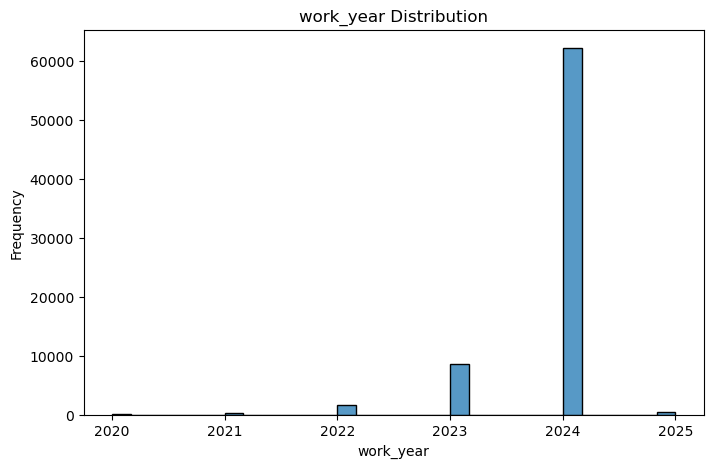

In [16]:
year_dist=df['work_year'].value_counts()
print(f"Work year:\n{year_dist.head()}")
plt.figure(figsize=(8,5))
sns.histplot(df['work_year'], bins=30, color='tab:blue', edgecolor='black')
plt.title('work_year Distribution'); plt.xlabel('work_year'); plt.ylabel('Frequency')
plt.show()

### The huge spike in 2024 (62,228 records) suggests a massive hiring or reporting activity in this year. This could indicate that companies are offering more new positions or updating salaries recently.

## Distribution of Remote Ratio

remote work ratio:
remote_ratio
0      57220
100    15647
50       281
Name: count, dtype: int64


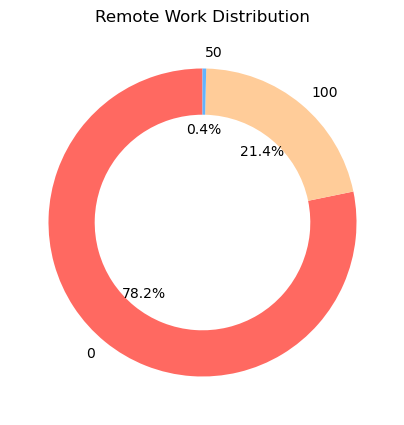

In [17]:
remote_dist = df['remote_ratio'].value_counts()
print(f"remote work ratio:\n{remote_dist.head()}")
plt.figure(figsize=(5,5))  # good square size for pie chart
plt.pie(remote_dist, labels=remote_dist.index, autopct='%1.1f%%', startangle=90, colors=['#ff6961', '#ffcc99', '#61b3ff'],wedgeprops={'width':0.3})
plt.title('Remote Work Distribution')
plt.show()

### Remote Work Ratio Distribution

#### Majority of employees work fully on-site (0% remote), with 57,220 people.

#### Fully remote roles (100%) account for 15,647 employees.

#### Partial remote (50%) is extremely rare, with only 281 employees.

#### Takeaway: Companies heavily favor either fully on-site or fully remote setups, while partial remote work is almost nonexistent

## Distribution of Salary in USD

salary in usd:
salary_in_usd
160000    1426
110000    1157
150000    1092
100000     976
180000     963
Name: count, dtype: int64


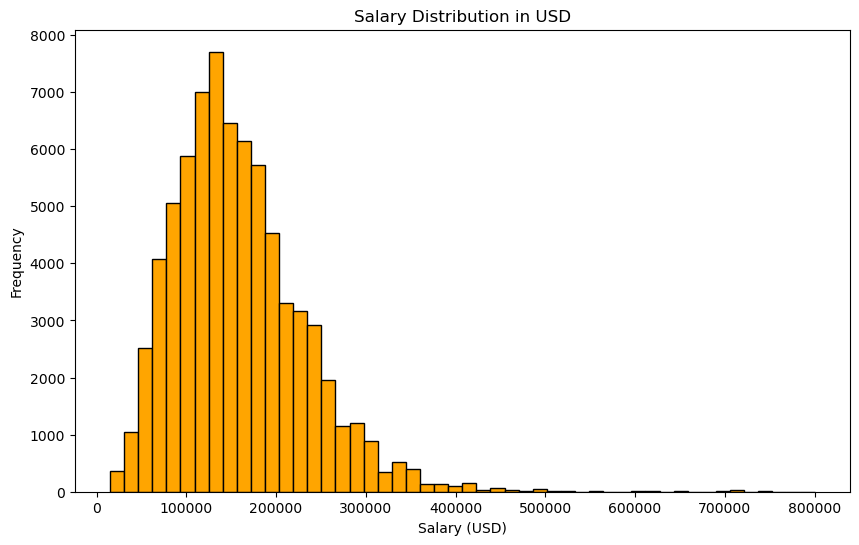

In [18]:
salary_dist = df['salary_in_usd'].value_counts()
print(f"salary in usd:\n{salary_dist.head()}")
plt.figure(figsize=(10,6))
plt.hist(df['salary_in_usd'], bins=50, color='orange', edgecolor='black')
plt.title('Salary Distribution in USD')
plt.xlabel('Salary (USD)')
plt.ylabel('Frequency')
plt.show()

### The above histogram means most employees earn lower to mid-range salaries, while a few have very high salaries.

## Salary Relationships

## Salary trends across Years

   work_year  salary_in_usd
0       2020  102250.866667
1       2021   99922.073394
2       2022  134183.903556
3       2023  153700.755456
4       2024  159610.708556
5       2025  144021.863229


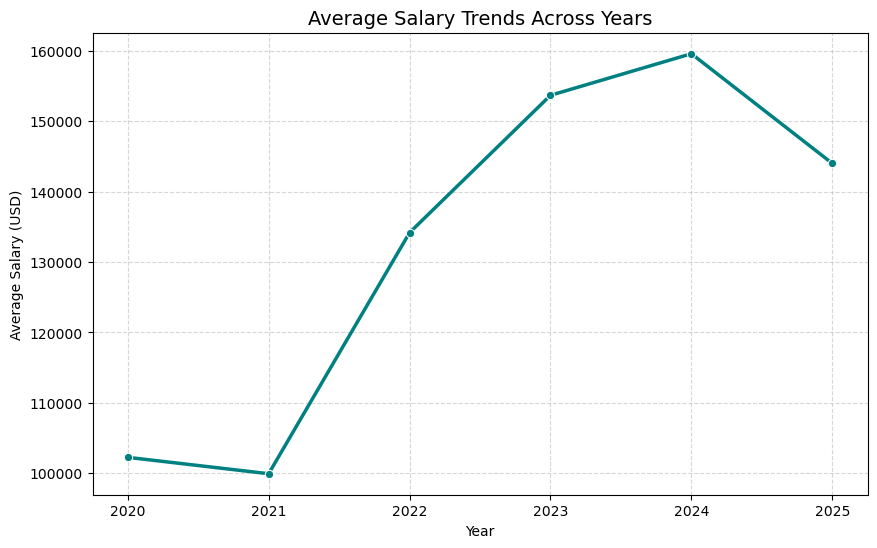

In [19]:
# Group by year
yearly_salary = df.groupby("work_year")["salary_in_usd"].mean().reset_index()
print(yearly_salary)
plt.figure(figsize=(10,6))
sns.lineplot(data=yearly_salary, x="work_year", y="salary_in_usd",marker="o",linewidth=2.5,color="teal")
plt.title("Average Salary Trends Across Years", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Average Salary (USD)")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

#### 2020–2021: Average salaries hovered around $100K, with a slight dip in 2021, likely reflecting early pandemic uncertainty and budget freezes.

#### 2022–2024: Salaries surged sharply, climbing from $134K in 2022 to nearly $160K in 2024. This reflects a post-pandemic hiring boom, remote work expansion, and intense competition for tech talent.

#### 2025: Salaries dropped by nearly 10%, falling back to $144K, suggesting a market correction, cost optimizations, or oversupply of candidates after years of rapid growth.

#### Overall Trend: Despite the recent dip, salaries in 2025 are still ~40% higher than pre-2022 levels, underscoring a long-term upward trajectory in pay for data roles.

### Average Salary Across Experience Levels

Average Salary By Experience Level:
experience_level
Entry-level        101701.091319
Executive-level    199244.117135
Mid-level          142892.254268
Senior-level       173297.812980
Name: salary_in_usd, dtype: float64


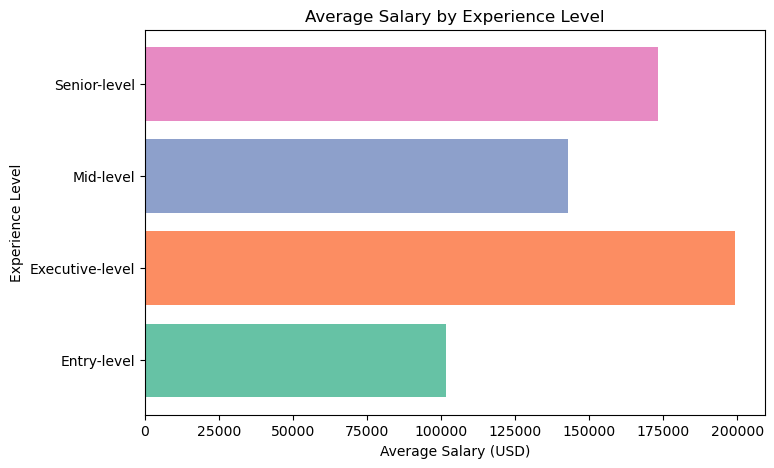

In [20]:
# Calculate average salary per experience level
avg_salary = df.groupby('experience_level')['salary_in_usd'].mean()
print(f"Average Salary By Experience Level:\n{avg_salary.head()}")

plt.figure(figsize=(8,5))
plt.barh(avg_salary.index, avg_salary.values, color=['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3'])
plt.title('Average Salary by Experience Level')
plt.xlabel('Average Salary (USD)')
plt.ylabel('Experience Level')
plt.show()


#### Average Salary by Experience Level:-

#### Executive-level roles offer the highest average salary (~$199k), followed by Senior-level (~$173k) and Mid-level (~$143k).

#### Entry-level positions start significantly lower, averaging around $102k.

#### Takeaway: Salary increases clearly with experience, with the largest jump seen from Senior to Executive-level, highlighting the premium for leadership and strategic roles.

## Average salary by job title (Top 15)

Top 15 Jobs by Average Salary:
job_title
Analytics Engineering Manager            399880.000000
Data Science Tech Lead                   375000.000000
Applied AI ML Lead                       292500.000000
Head of Machine Learning                 288701.000000
Machine Learning Performance Engineer    262500.000000
Engineering Manager                      259792.382514
AWS Data Architect                       258000.000000
Cloud Data Architect                     250000.000000
Enterprise Account Executive             246500.000000
Machine Learning Model Engineer          245625.000000
Head of AI                               243725.000000
Director of Machine Learning             242050.000000
Principal Researcher                     230600.000000
ML Infrastructure Engineer               229300.000000
Head of Data                             223934.487805
Name: salary_in_usd, dtype: float64


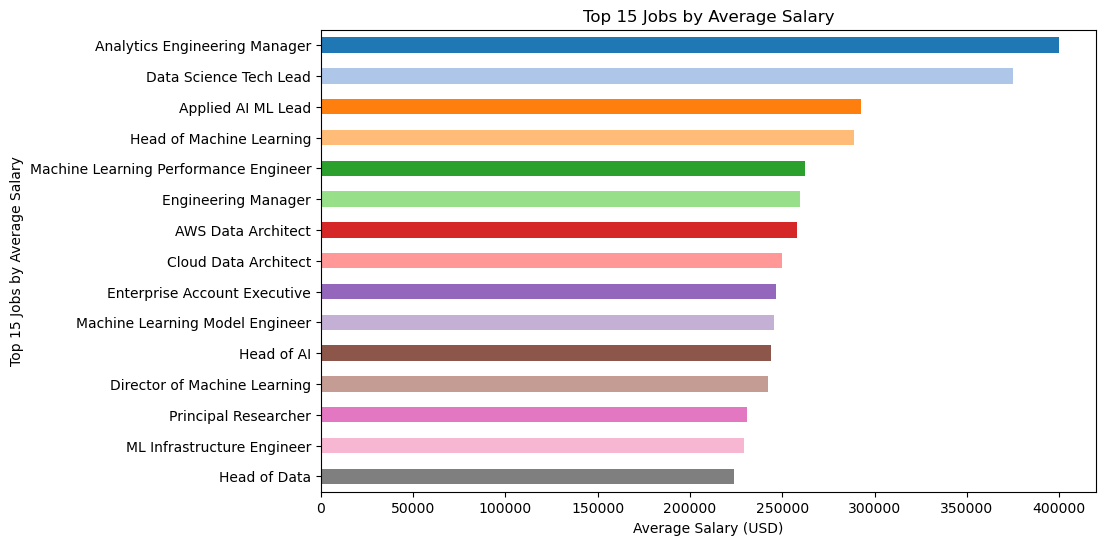

In [21]:
# Top 15 Jobs by Avg Salary
job_salary = df.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=False).head(15)
print(f"Top 15 Jobs by Average Salary:\n{job_salary.head(15)}")

colors = sns.color_palette("tab20", len(job_salary))

job_salary.plot(kind="barh",figsize=(10,6),color=colors,title="Top 15 Jobs by Average Salary")
plt.xlabel("Average Salary (USD)")
plt.ylabel("Top 15 Jobs by Average Salary")
plt.gca().invert_yaxis()  #  the highest salary shows at top
plt.show()

#### 💡 Top-Paying Jobs in Data & Tech

#### Highest earners:

#### Analytics Engineering Manager leads with an average salary of $399.9k, followed by Data Science Tech Lead ($375k) and Applied AI/ML Lead ($292.5k).

#### Leadership roles dominate:

#### Roles such as Head of Machine Learning, Head of AI, and Director of Machine Learning all pay above $240k, reflecting the premium for managerial and strategic expertise in AI/ML.

#### Specialized technical roles:

#### Positions like Machine Learning Performance Engineer, ML Model Engineer, AWS & Cloud Data Architects also command high salaries ($245k–$262.5k), highlighting the value of deep technical skills in AI, ML, and cloud infrastructure.

#### Takeaway: Top-paying jobs combine technical mastery with leadership responsibilities, with AI/ML and data architecture roles leading the pack.


### Average Salary by Company Location

Top 10 company locations by average salary:
company_location
QA    300000.000000
VE    192500.000000
CZ    179411.500000
US    163803.553373
PR    152366.666667
IL    143757.941176
SA    139999.333333
EG    134407.317073
CA    134385.431809
LB    128833.333333
Name: salary_in_usd, dtype: float64


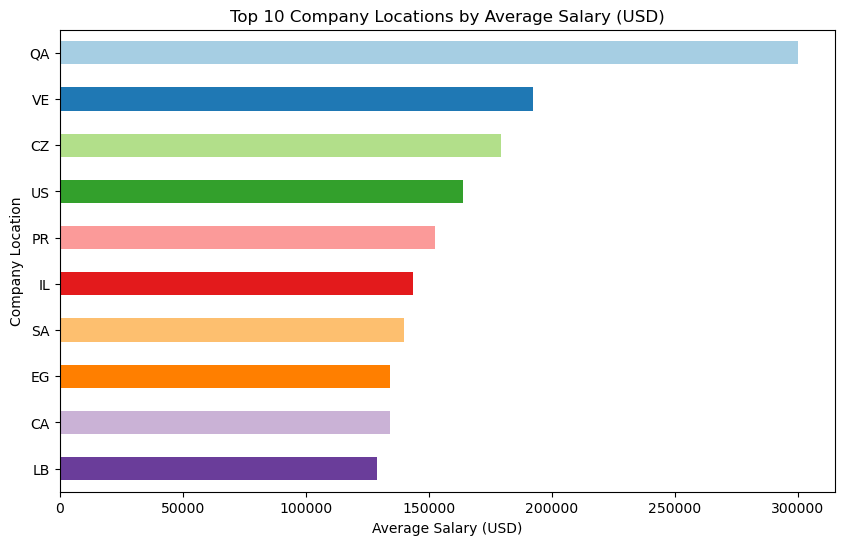

In [22]:
# Top 10 company locations by average salary
loc_salary = df.groupby("company_location")["salary_in_usd"].mean().sort_values(ascending=False).head(10)
print(f"Top 10 company locations by average salary:\n{loc_salary.head(15)}")

colors = sns.color_palette("Paired", len(loc_salary))
plt.figure(figsize=(10,6))
loc_salary.plot(kind="barh", color=colors)
plt.title("Top 10 Company Locations by Average Salary (USD)")
plt.xlabel("Average Salary (USD)")
plt.ylabel("Company Location")
plt.gca().invert_yaxis() 
plt.show()

#### 💡 Top Company Locations by Average Salary

#### Highest-paying locations:

#### QA (Qatar) leads with an average salary of $300k, followed  by VE (Venezuela, $192.5k) and CZ (Czech Republic, $179.4k).

#### Strong US and PR presence:

#### US averages $163.8k, while PR (Puerto Rico) comes in at $152.4k.

#### Other notable regions:

#### IL (Israel, $143.8k), SA (Saudi Arabia, $140k), EG (Egypt, $134.4k), CA (Canada, $134.4k), LB (Lebanon, $128.8k).

#### Takeaway: Location has a major impact on salaries, with Middle Eastern countries (QA, VE) and some European locations (CZ) offering the highest averages

## Average salary by Company Size

company_size
M    158344.832157
L    154301.902784
S     87677.673171
Name: salary_in_usd, dtype: float64


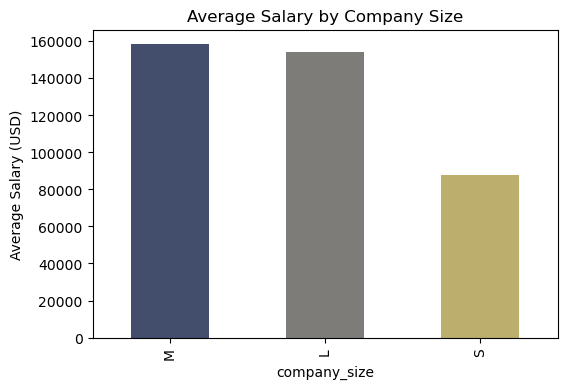

In [23]:
# Average salary across company sizes
company_salary = df.groupby("company_size")["salary_in_usd"].mean().sort_values(ascending=False)
print(company_salary)

colors = sns.color_palette("cividis", len(company_salary))
company_salary.plot(kind="bar", figsize=(6,4), color=colors)
plt.title("Average Salary by Company Size")
plt.ylabel("Average Salary (USD)")
plt.show()

#### Salary Insights by Company Size

#### Medium (M) and Large (L) companies offer comparable high salaries, averaging ≈ $158k and $154k respectively.

#### Small (S) companies pay significantly less, averaging ≈ $87.7k.

#### Key takeaway: Company size strongly influences salary, with medium and large companies offering the most lucrative opportunities, while small companies lag behind.


##                             Salary differences across remote ratios and company_size

   remote_ratio company_size  salary_in_usd
0             0            L  166419.070825
1             0            M  160719.436141
2             0            S  103671.240000
3            50            L   87502.353933
4            50            M   70587.836066
5            50            S   77673.309524
6           100            L  121556.020772
7           100            M  150059.632296
8           100            S   84319.309735


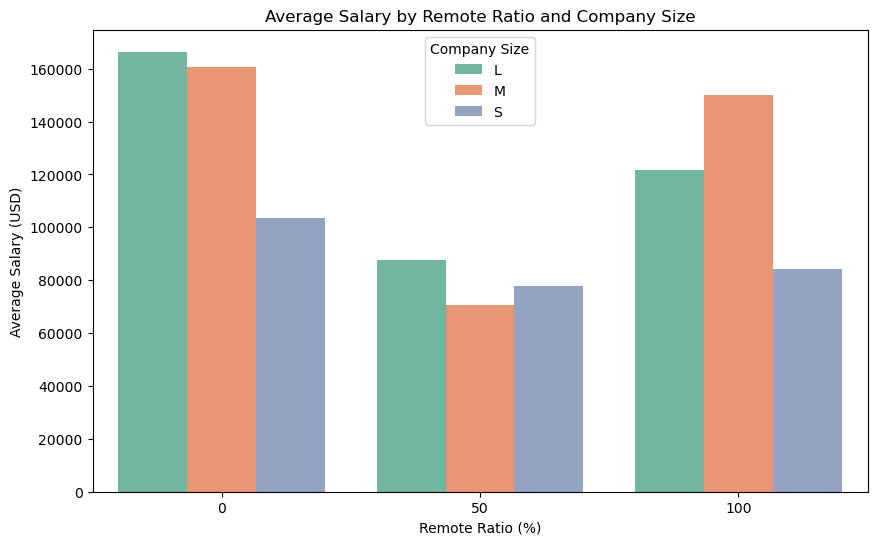

In [24]:
# Calculate average salary grouped by remote_ratio & company_size
cluster_data = df.groupby(["remote_ratio", "company_size"])["salary_in_usd"].mean().reset_index()

print(cluster_data)
plt.figure(figsize=(10,6))
sns.barplot(x="remote_ratio", y="salary_in_usd", hue="company_size", data=cluster_data, palette="Set2")
plt.title("Average Salary by Remote Ratio and Company Size")
plt.xlabel("Remote Ratio (%)")
plt.ylabel("Average Salary (USD)")
plt.legend(title="Company Size")
plt.show()

#### Salary Insights: Remote Ratio & Company Size

#### Large companies (L) offer the highest salaries, peaking at 0% and 100% remote, with a dip at 50% remote.

#### Medium companies (M) pay the most for fully remote roles, while partial remote roles see lower salaries.

#### Small companies (S) have consistently lower salaries, with minimal variation across remote ratios.

#### Key takeaway: For top pay, target large or medium companies with fully remote or fully on-site roles; partial remote may offer less.

### Salary Progression Analysis by Role

experience_level        Entry-level  Senior-level       Gap
job_title                                                  
Deep Learning Engineer     135000.0      293583.5  158583.5
Finance Data Analyst        40000.0      192900.5  152900.5
AI Scientist                38708.0      191000.0  152292.0
Solutions Engineer          45083.0      182812.5  137729.5
AI Programmer               60207.0      188645.0  128438.0
Solutions Architect         59999.5      180000.0  120000.5
Data Analytics Manager      27000.0      145000.0  118000.0
Stage                       27371.0      143350.0  115979.0
AI Engineer                 57146.0      170000.0  112854.0
Bear Robotics               80000.0      190000.0  110000.0


<Figure size 1000x600 with 0 Axes>

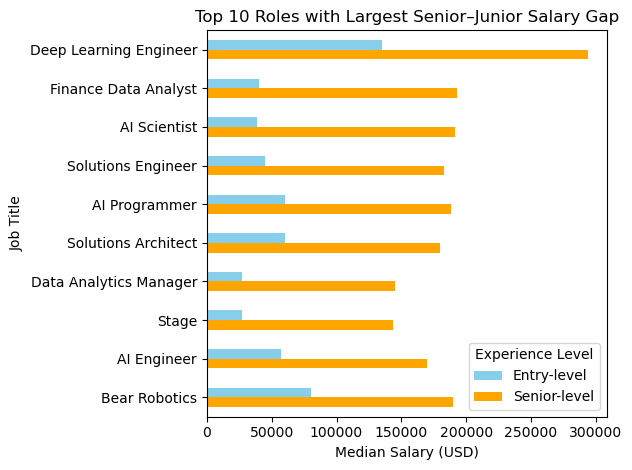

In [41]:
salary_gap = (df.groupby(['job_title', 'experience_level'])['salary_in_usd'].median().unstack()
              .assign(Gap=lambda x: x['Senior-level'] - x['Entry-level']).sort_values('Gap', ascending=False))

print(salary_gap[['Entry-level', 'Senior-level', 'Gap']].dropna().head(10))

# Select top 10 roles by salary gap
top_gap = salary_gap[['Entry-level', 'Senior-level', 'Gap']].dropna().head(10)

# Plot side-by-side horizontal bars
plt.figure(figsize=(10,6))
top_gap[['Entry-level','Senior-level']].plot(kind='barh', color=['skyblue','orange'])
plt.xlabel('Median Salary (USD)')
plt.ylabel('Job Title')
plt.title('Top 10 Roles with Largest Senior–Junior Salary Gap')
plt.gca().invert_yaxis()  # largest gap on top
plt.legend(title='Experience Level')
plt.tight_layout()
plt.show()


### Senior–Junior Salary Gaps 

#### Largest Gaps: Roles like Deep Learning Engineer, Finance Data Analyst, and AI Scientist show $150k+ difference between junior and senior levels, highlighting the high value of experienced talent.

#### High-Demand Roles: AI/ML and specialized technical positions command the biggest pay jumps, indicating strong market competition and scarcity of expertise.

#### Retention & Recruitment: Significant gaps reveal critical senior positions — companies can attract entry-level talent cost-effectively, but must offer competitive packages to retain top senior professionals.

#### Understanding these gaps supports payroll forecasting, promotion planning, talent development, and career path structuring, ensuring long-term retention and alignment with market benchmarks.

# 📌 Conclusion

#### The analysis highlights key trends in salaries, roles, and workforce distribution in the data and tech sector:

#### Experience and company size strongly influence pay, with Executive/Senior-level roles and large/medium companies offering the highest salaries.

#### AI/ML leadership and specialized technical roles command top compensation.

#### US-centric data dominates both employee residence and company location, with most salaries reported in USD.

#### Full-time and fully remote or fully on-site roles are most common, while partial remote and entry-level positions are rare.

#### Senior–junior salary gaps are largest in AI/ML and specialized technical roles, highlighting the high value of experienced talent and strong market demand.Understanding these gaps helps companies plan promotions, retain critical senior staff, and align compensation with market benchmarks.

#### Business Takeaway: These insights can help companies benchmark salaries, plan promotions, retain key senior staff, and make informed decisions on compensation, talent management, and career progression.
